# Load Data

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('yoy_employee.csv', parse_dates=['date'], skiprows=[0],
                 names=['div', 'bu', 'date', 'overtime (hours)', 'occupancy', 'online time'])

df.head()

,div,bu,date,overtime (hours),occupancy,online time
0,WISE,WISE,2019-03-01,28,85%,67%
1,WISE,WISE,2019-04-01,24,82%,66%
2,WISE,WISE,2019-05-01,18,79%,61%
3,WISE,WISE,2019-06-01,18,82%,56%
4,WISE,WISE,2019-07-01,22,82%,67%


# Clean Data

In [91]:
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['occupancy'] = pd.to_numeric(df['occupancy'].str.replace('%', ''), errors='coerce')/100
df['online time'] = pd.to_numeric(df['online time'].str.replace('%', ''), errors='coerce')/100

df = df[~df['month'].isin(['January', 'February', 'November', 'December'])]

# save a copy for later
df1 = df.copy()

In [92]:
def plot_bu(df, kpi, group='bu'):
    for i, bu in enumerate(df[group].unique()):
        plt.figure(figsize=(10,4), dpi=100)
        ax = sns.barplot(data=df[df[group]==bu], palette='viridis', x='month', y=kpi, hue='year', errwidth=0)
        plt.title(kpi+' - '+bu, y=1.08)
        
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            if kpi in ['occupancy', 'online time']:
                vals = ax.get_yticks()
                ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
                ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 9), 
                           textcoords = 'offset points')
            else:
                ax.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 9), 
                           textcoords = 'offset points')
        plt.ylabel('')
        plt.xlabel('')
        ax.legend(loc='right', bbox_to_anchor=(1.12,0.5))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()
        plt.show()

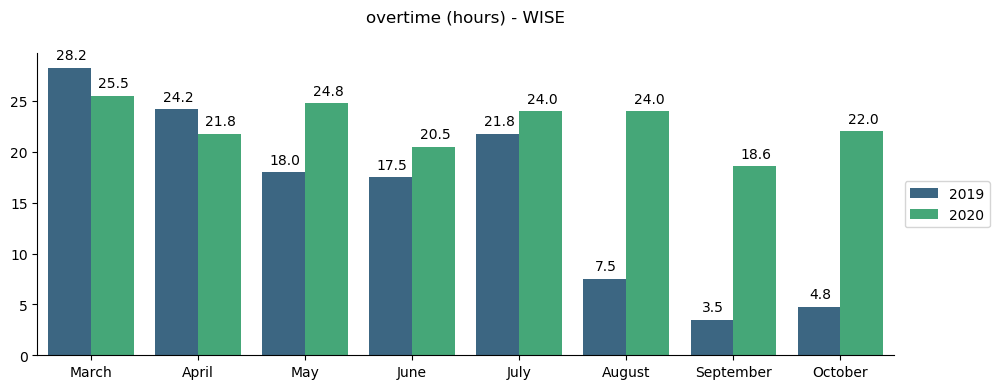

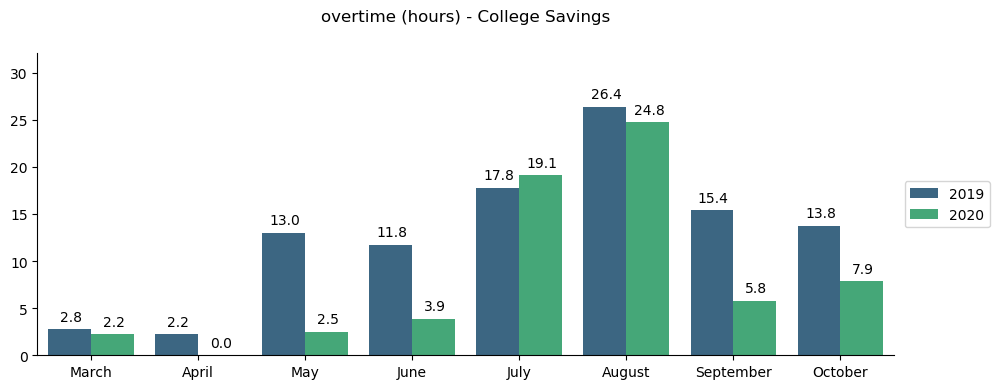

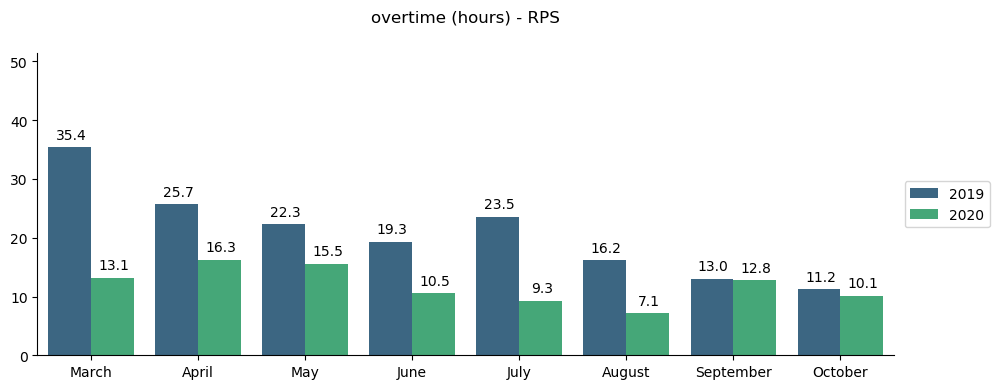

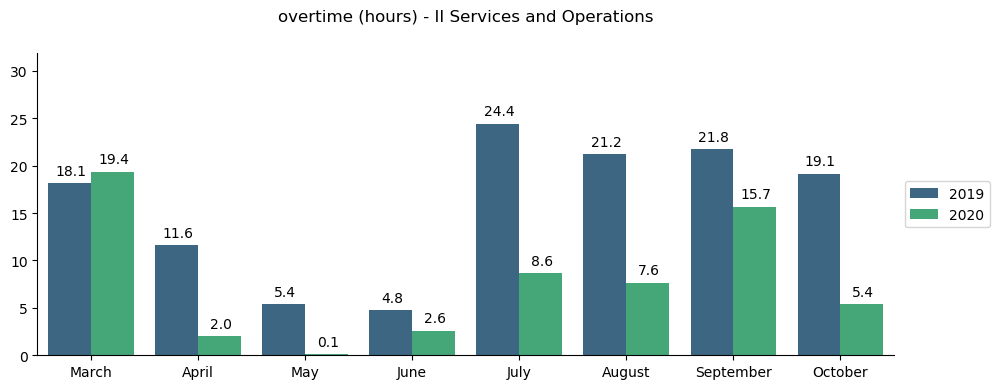

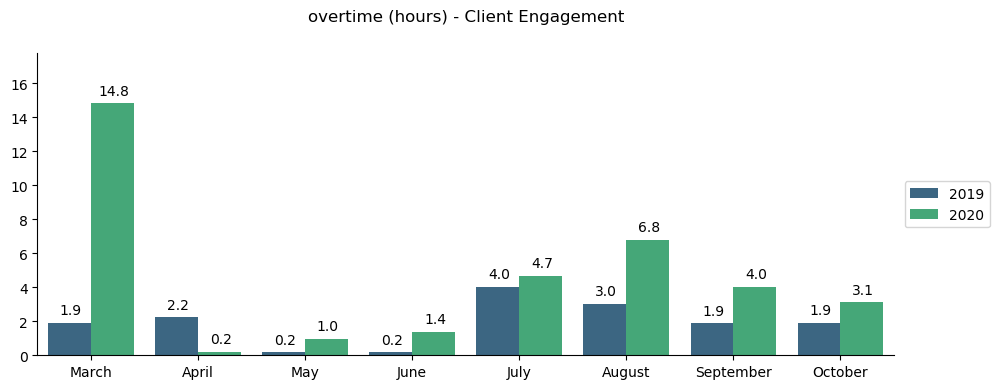

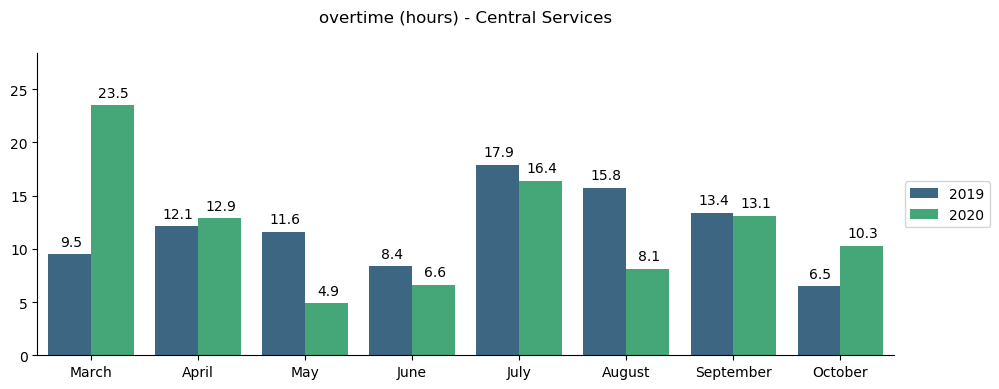

In [93]:
plot_bu(df, 'overtime (hours)', group='div')

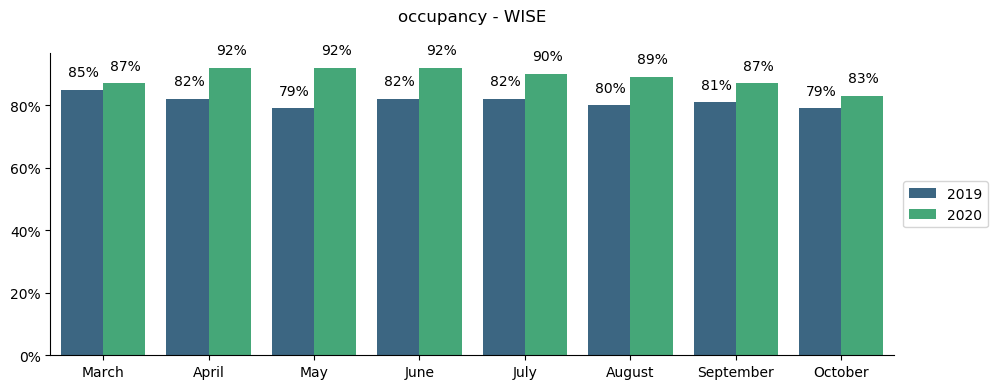

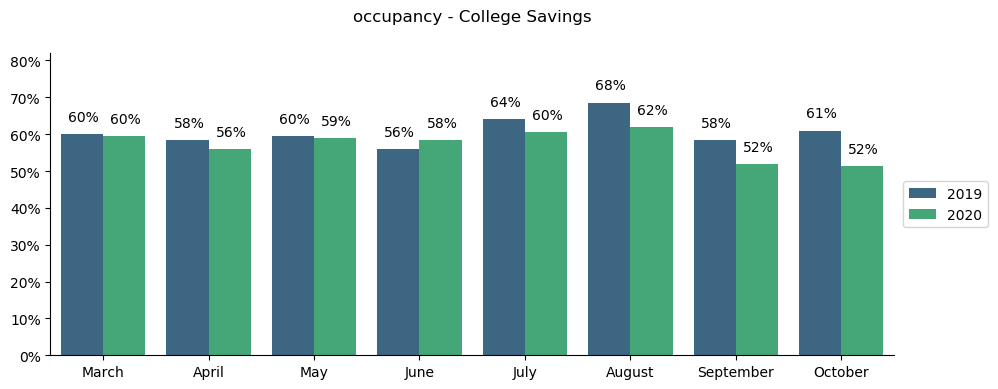

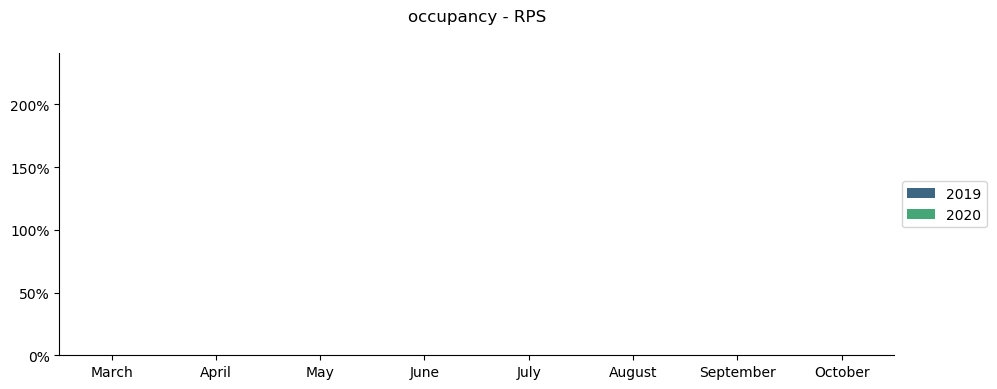

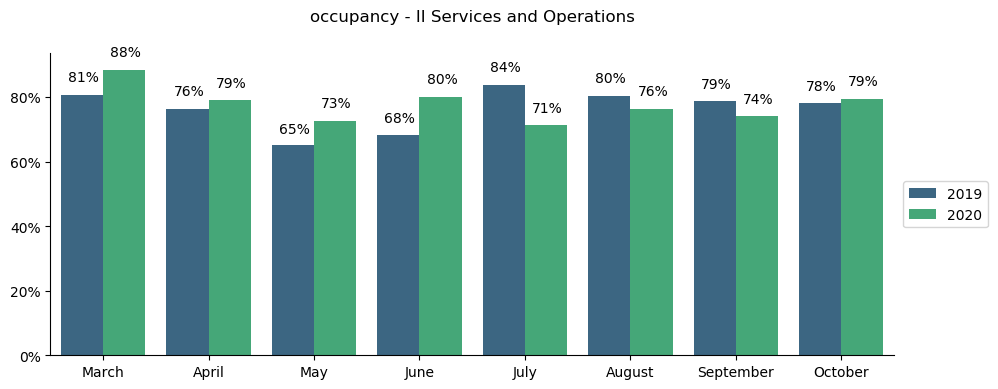

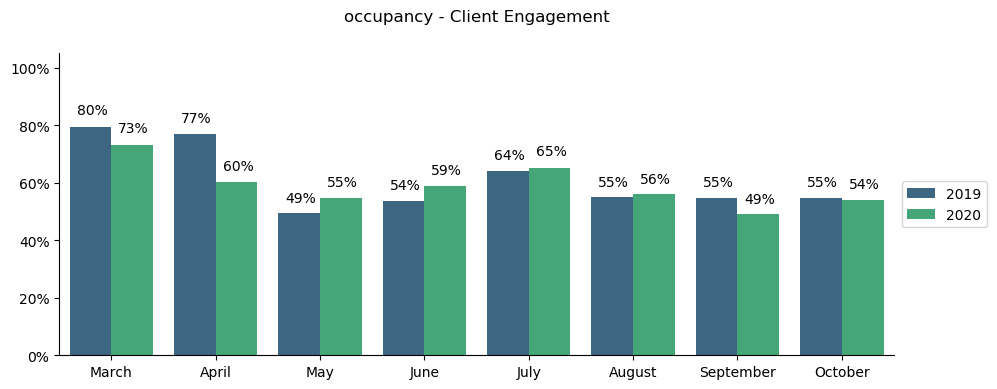

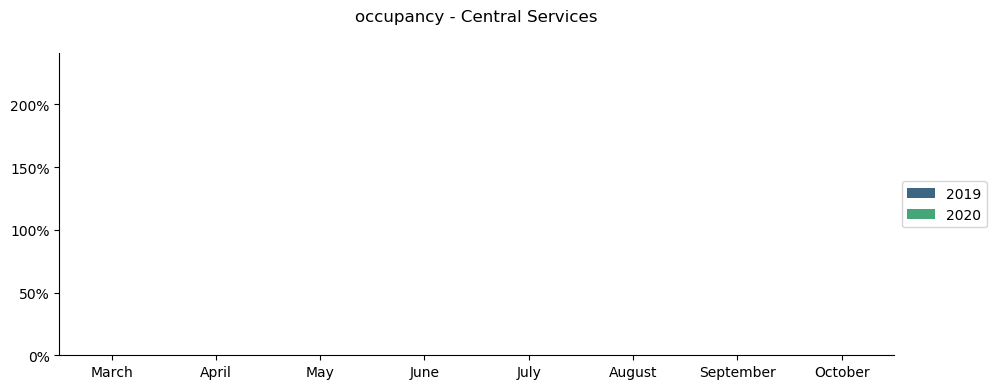

In [94]:
plot_bu(df, 'occupancy', group='div')

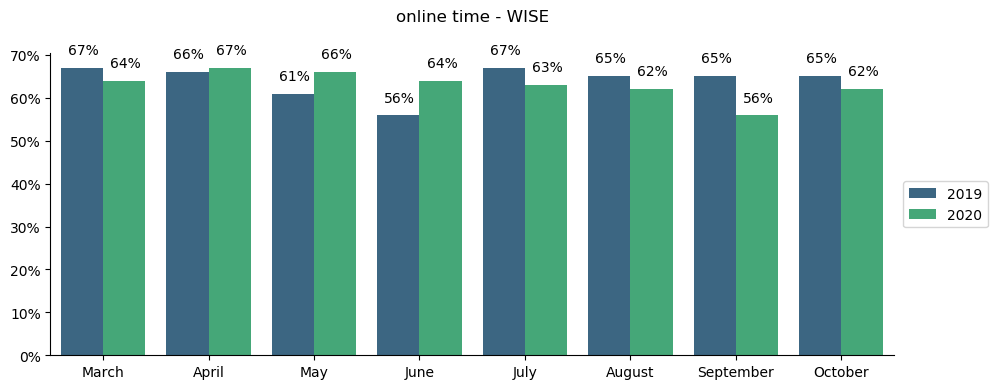

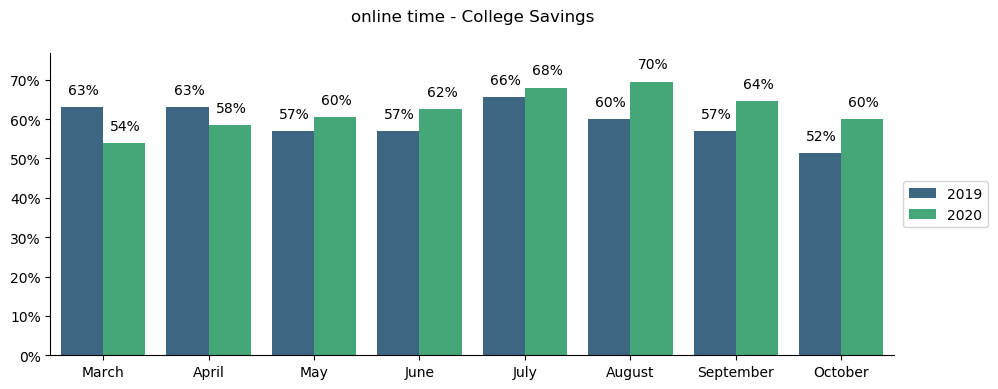

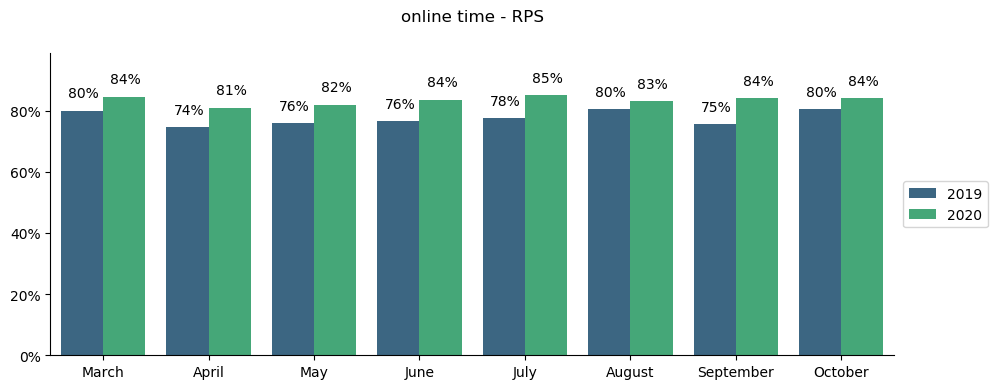

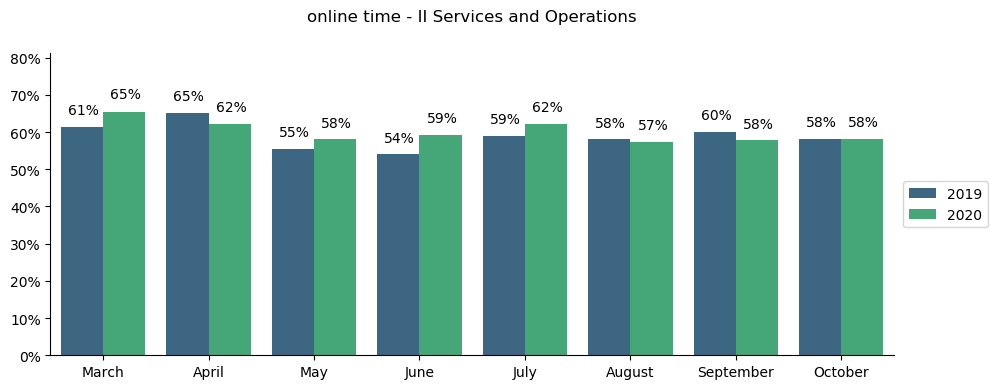

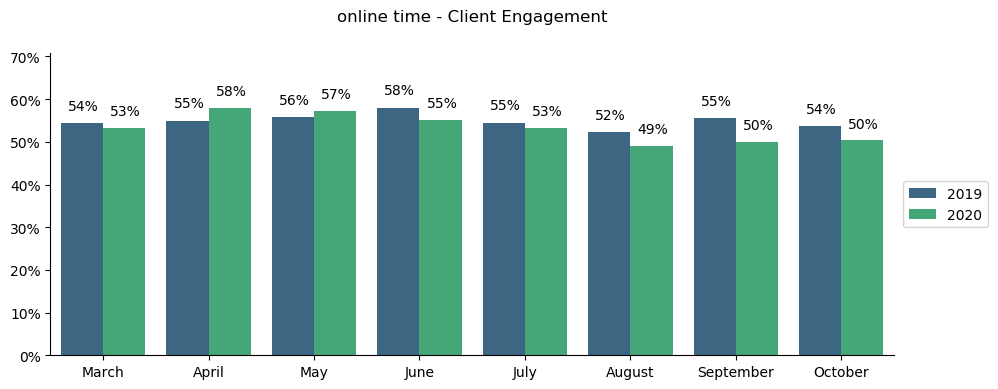

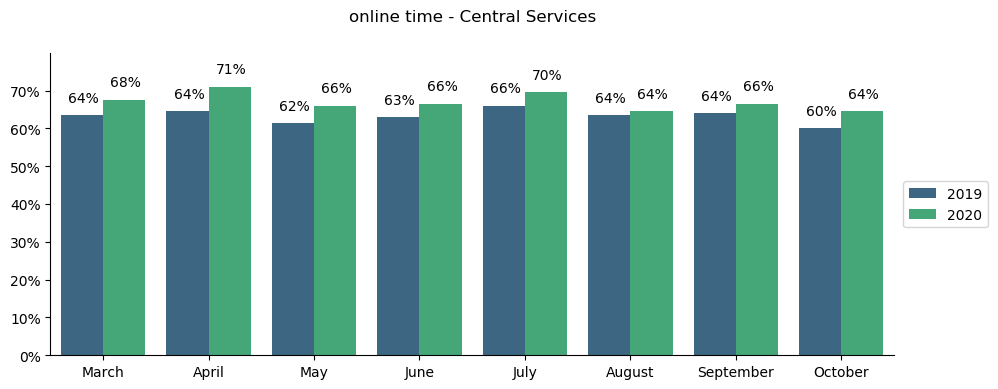

In [95]:
plot_bu(df, 'online time', group='div')

# What is the sum of overtime by division?

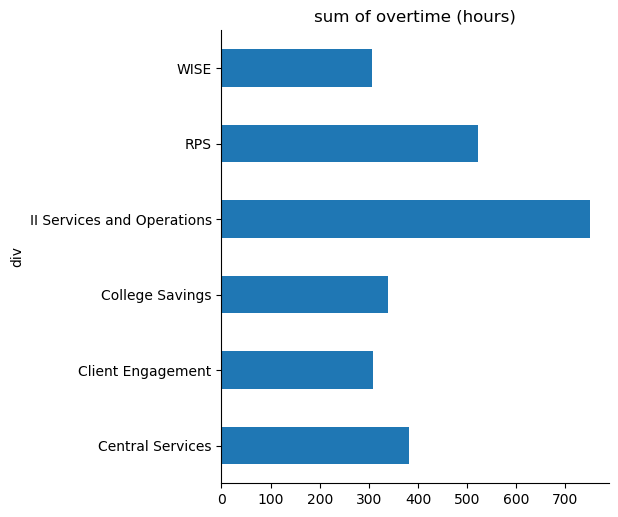

In [96]:
plt.figure(figsize=(5,6), dpi=100)
plt.title('sum of overtime (hours)')
ax = (df1.groupby('div')['overtime (hours)'].sum()).plot.barh()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# What is the mean occupancy and online time by division?

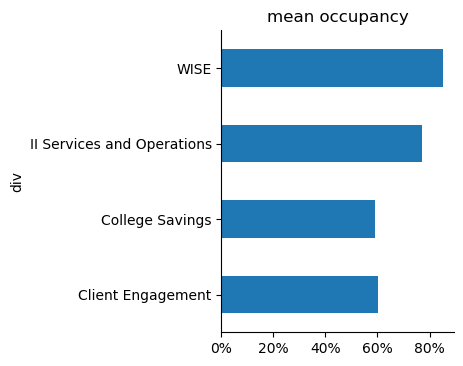

In [97]:
plt.figure(figsize=(3,4), dpi=100)
plt.title('mean occupancy')
ax = (df1[~df1['div'].isin(['RPS', 'Central Services'])].groupby('div')['occupancy'].mean()).plot.barh()
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    vals = ax.get_xticks()

ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

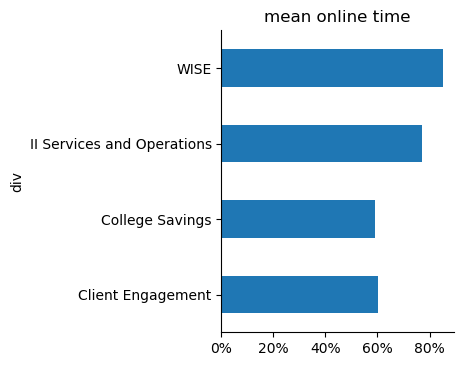

In [98]:
plt.figure(figsize=(3,4), dpi=100)
plt.title('mean online time')
ax = (df1[~df1['div'].isin(['RPS', 'Central Services'])].groupby('div')['occupancy'].mean()).plot.barh()
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

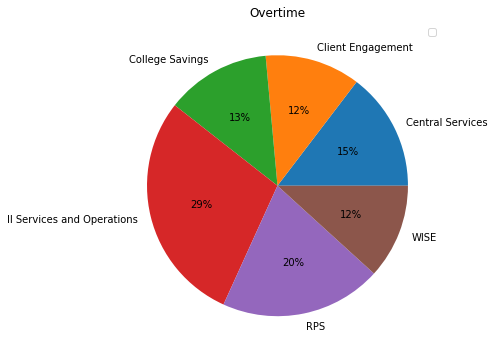

In [99]:
pd.options.display.float_format = '{:,.0f}'.format
df[['div', 'overtime (hours)']].groupby(['div']).sum().plot(subplots=True, 
                kind='pie',
                  figsize=(6, 6),
                  autopct='%0.0f%%',
                  shadow=False)
plt.title('Overtime')
plt.legend('')
plt.ylabel('')
plt.show()

# Future Work

Port this dataset to tableau and try to recreate the paired barplot.